In [118]:
import netket as nk
import jax.numpy as jnp
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"
import numpy as np
from scipy.sparse.linalg import eigsh
import jax
from netket.operator.spin import sigmax,sigmaz
import jax.flatten_util
import pickle
from typing import Union, Any
import numpy as np
import jax
from jax import numpy as jnp
from flax import linen as nn
from jax.nn.initializers import normal
from netket.utils.types import NNInitFunc
from netket import nn as nknn
default_kernel_init = normal(stddev=0.01)
from tqdm import tqdm
import datetime
import matplotlib.pyplot as plt
from tqdm import trange
import time
import json
import glob
from sklearn.decomposition import KernelPCA


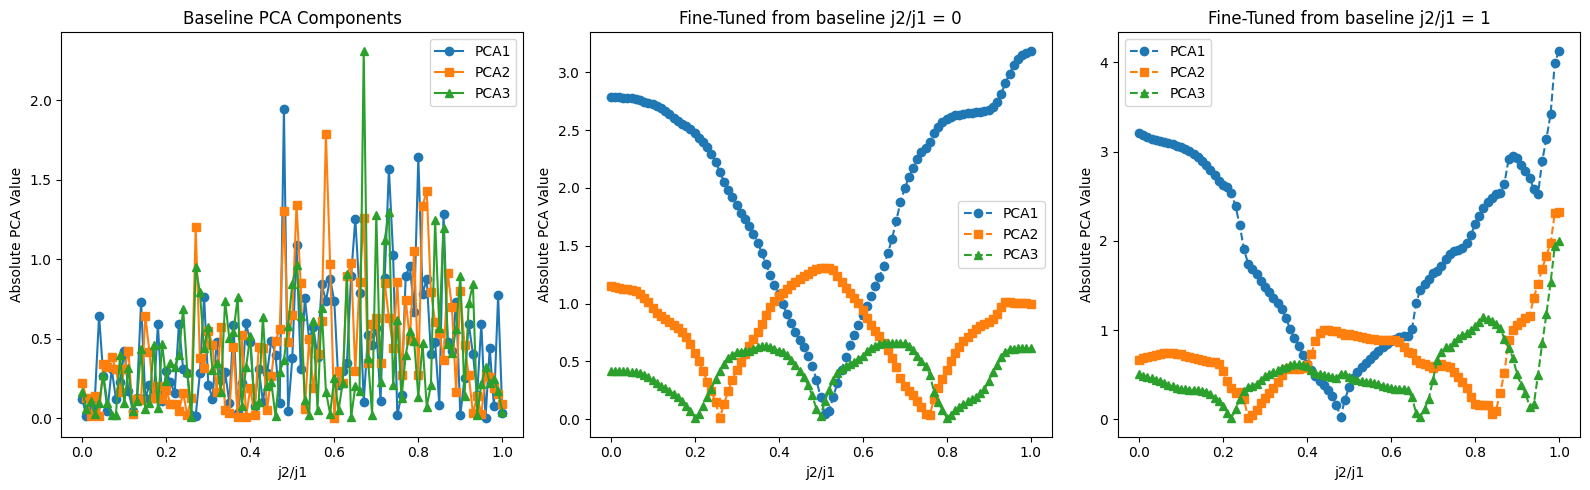

In [123]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
import numpy as np

index = 2

with open(f'configs/config_{index}.json', 'r') as f:
    config = json.load(f)

optimizer = config['optimizers']
optimizers = {'sgd': nk.optimizer.Sgd, 'adam': nk.optimizer.Adam}
learning_rate = config['learning_rates']
system_size = config['system_size']
alpha = config['alpha']
training_steps = config['training_steps']
symmetric = config['symmetric']
dj = config['dj']
j2j1_low = config['j2j1_low']
j2j1_high = config['j2j1_high']
L = system_size
js = np.arange(j2j1_low, j2j1_high+1e-10, dj)

baseline_js = [0.0, 1.0]
with open(f'results/{index}/baselines/all_results.json', 'r') as f:
    results = json.load(f)
    
with open(f'results/{index}/finetune/baseline_j0.000/all_results.json', 'r') as f:
    results_ft_0 = json.load(f)

with open(f'results/{index}/finetune/baseline_j1.000/all_results.json', 'r') as f:
    results_ft_1 = json.load(f)

# Assuming results and js arrays are already loaded
params_all_j = [results[f'{j:.3f}']['params_real'] for j in js]
params_all_j_ft_0 = [results_ft_0[f'{j:.3f}']['params_real'] for j in js]
params_all_j_ft_1 = [results_ft_1[f'{j:.3f}']['params_real'] for j in js]

# Apply Kernel PCA
pca = KernelPCA(n_components=5, kernel='linear')
X = pca.fit_transform(params_all_j)

pca_ft = KernelPCA(n_components=5, kernel='linear')
X_ft_0 = pca_ft.fit_transform(params_all_j_ft_0)
pca_ft = KernelPCA(n_components=5, kernel='linear')
X_ft_1 = pca_ft.fit_transform(params_all_j_ft_1)

# Create figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# First subplot: Baseline PCA components
axes[0].plot(js, np.abs(X[:, 0]), label='PCA1', linestyle='-', marker='o')
axes[0].plot(js, np.abs(X[:, 1]), label='PCA2', linestyle='-', marker='s')
axes[0].plot(js, np.abs(X[:, 2]), label='PCA3', linestyle='-', marker='^')
# axes[0].plot(js, np.abs(X[:, 3]), label='PCA4', linestyle='-', marker='v')
# axes[0].plot(js, np.abs(X[:, 4]), label='PCA5', linestyle='-', marker='>')
axes[0].set_title("Baseline PCA Components")
axes[0].set_xlabel("j2/j1")
axes[0].set_ylabel("Absolute PCA Value")
axes[0].legend()

# Second subplot: Fine-Tuned PCA components
axes[1].plot(js, np.abs(X_ft_0[:, 0]), label='PCA1', linestyle='--', marker='o')
axes[1].plot(js, np.abs(X_ft_0[:, 1]), label='PCA2', linestyle='--', marker='s')
axes[1].plot(js, np.abs(X_ft_0[:, 2]), label='PCA3', linestyle='--', marker='^')
# axes[1].plot(js, np.abs(X_ft_0[:, 3]), label='PCA4', linestyle='-', marker='v')
# axes[1].plot(js, np.abs(X_ft_0[:, 4]), label='PCA5', linestyle='-', marker='>')
axes[1].set_title("Fine-Tuned from baseline j2/j1 = 0")
axes[1].set_xlabel("j2/j1")
axes[1].set_ylabel("Absolute PCA Value")
axes[1].legend()

# Second subplot: Fine-Tuned PCA components
axes[2].plot(js, np.abs(X_ft_1[:, 0]), label='PCA1', linestyle='--', marker='o')
axes[2].plot(js, np.abs(X_ft_1[:, 1]), label='PCA2', linestyle='--', marker='s')
axes[2].plot(js, np.abs(X_ft_1[:, 2]), label='PCA3', linestyle='--', marker='^')
# axes[2].plot(js, np.abs(X_ft_1[:, 3]), label='PCA4', linestyle='-', marker='v')
# axes[2].plot(js, np.abs(X_ft_1[:, 4]), label='PCA5', linestyle='-', marker='>')
axes[2].set_title("Fine-Tuned from baseline j2/j1 = 1")
axes[2].set_xlabel("j2/j1")
axes[2].set_ylabel("Absolute PCA Value")
axes[2].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()
